# 🧬 Red Neuronal Multicapa (MLP) desde cero en Python

A continuación se mostrará cómo se construyó una red neuronal con una capa oculta para aprender la compuerta lógica **XOR** utilizando datos de 4 bits. A diferencia del perceptrón simple, el MLP puede aprender funciones que **no son linealmente separables**.

---

## 📘 ¿Qué es una red neuronal multicapa?

Una red neuronal multicapa (MLP) consta de:

- Una **capa de entrada**: recibe los datos (en nuestro caso, 4 bits).
- Al menos una **capa oculta**: permite aprender patrones no lineales.
- Una **capa de salida**: genera la predicción.

### 🧪 Función de activación: Sigmoide

Usamos la función sigmoide para introducir no linealidad:



$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$



Y su derivada para retropropagación:



$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
$$



### 🔄 Backpropagation (propagación hacia atrás)

1. Calcular el error en la salida
2. Propagar ese error hacia la capa oculta
3. Ajustar pesos proporcional al gradiente

---


## 💹 Preparación de datos

In [10]:
import numpy as np
import pandas as pd

# Leer el dataset
archivo_excel = pd.read_excel('Recursos/CompuertaXOR.xlsx')
X = archivo_excel[["X1", "X2", "X3", "X4"]].values
y = archivo_excel[["d"]].values

# Mostrar los datos
archivo_excel


,X1,X2,X3,X4,d
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,0
4,0,1,0,0,1
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,0


___

## 🟰 Definición de las funciones de activación

In [11]:
# Función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


### Gráfico de las función Sigmoide y su Derivada

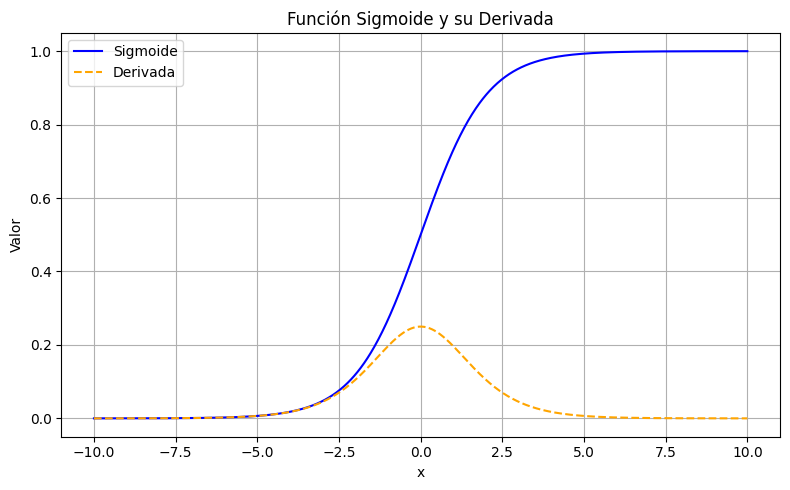

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

# Rango de valores para x
x_vals = np.linspace(-10, 10, 1000)
sig_vals = sigmoid(x_vals)
deriv_vals = sigmoid_derivative(sig_vals)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_vals, sig_vals, label='Sigmoide', color='blue')
plt.plot(x_vals, deriv_vals, label='Derivada', color='orange', linestyle='--')
plt.title('Función Sigmoide y su Derivada')
plt.xlabel('x')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


---
## Inicializar pesos, sesgos e hiperparámetros

In [13]:
# Parámetros
np.random.seed(42)
input_size = 4
hidden_size = 8
output_size = 1
learning_rate = 0.5
epochs = 1000

# Pesos y sesgos
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Lista para registrar el error por época
errores = []

___
## 🔁 Entrenamiento con Forward + Backpropagation

In [14]:
for epoch in range(epochs):
    # FORWARD
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # BACKPROPAGATION
    output_error = y - final_output
    output_delta = output_error * sigmoid_derivative(final_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Actualizar pesos
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Guardar error promedio
    loss = np.mean(np.square(output_error))
    errores.append(loss)

    if epoch % 100 == 0:
        print(f"Época {epoch}, Pérdida: {loss:.4f}")


Época 0, Pérdida: 0.2761
Época 100, Pérdida: 0.2501
Época 200, Pérdida: 0.2500
Época 300, Pérdida: 0.2498
Época 400, Pérdida: 0.2493
Época 500, Pérdida: 0.2474
Época 600, Pérdida: 0.2304
Época 700, Pérdida: 0.1543
Época 800, Pérdida: 0.0991
Época 900, Pérdida: 0.0802


___
## Gráfico del error por época

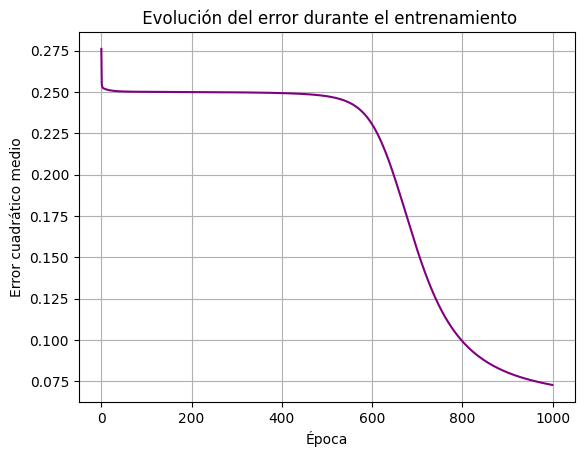

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), errores, color='purple')
plt.title(" Evolución del error durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Error cuadrático medio")
plt.grid(True)
plt.show()


---
## Predicciones Finales

In [16]:
print("\nPredicciones finales:")
for xi in X:
    hidden = sigmoid(np.dot(xi, weights_input_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden, weights_hidden_output) + bias_output)
    print(f"Entrada: {xi} → Predicción: {output.round(3)}")



Predicciones finales:
Entrada: [0 0 0 0] → Predicción: [[0.117]]
Entrada: [0 0 0 1] → Predicción: [[0.869]]
Entrada: [0 0 1 0] → Predicción: [[0.884]]
Entrada: [0 0 1 1] → Predicción: [[0.123]]
Entrada: [0 1 0 0] → Predicción: [[0.874]]
Entrada: [0 1 0 1] → Predicción: [[0.226]]
Entrada: [0 1 1 0] → Predicción: [[0.113]]
Entrada: [0 1 1 1] → Predicción: [[0.044]]
Entrada: [1 0 0 0] → Predicción: [[0.877]]
Entrada: [1 0 0 1] → Predicción: [[0.076]]
Entrada: [1 0 1 0] → Predicción: [[0.103]]
Entrada: [1 0 1 1] → Predicción: [[0.915]]
Entrada: [1 1 0 0] → Predicción: [[0.093]]
Entrada: [1 1 0 1] → Predicción: [[0.856]]
Entrada: [1 1 1 0] → Predicción: [[0.905]]
Entrada: [1 1 1 1] → Predicción: [[0.18]]


## 📌 Conclusiones

- El MLP logró aprender la función XOR, que **no puede resolverse con un perceptrón simple**.
- La capa oculta introduce la capacidad de modelar relaciones no lineales.
- La función sigmoide asegura activaciones suaves entre 0 y 1, ideal para clasificación binaria.
- Se utilizó backpropagation para ajustar pesos con base en el error de salida.